In [1]:
import csv

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras

from keras import layers
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout

from luwiji.pandas import illustration
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
label_data = 'model/keypoint_classifier/keypoint_classifier_label.csv'

In [3]:
# Data awal
label_data = 'model/keypoint_classifier/keypoint_classifier_label.csv'
nama_kolom = ["Huruf Hijaiyah"]
Label = pd.DataFrame(columns=nama_kolom)
Label["Huruf Hijaiyah"] = pd.read_csv(label_data, names=nama_kolom)["Huruf Hijaiyah"]

# Menambahkan kolom nomor
Label.insert(0, 'Nomor', range(1, len(Label) + 1))

# Menyetel ulang indeks
Label.set_index('Nomor', inplace=True)
Label

,Huruf Hijaiyah
Nomor,
1,Shad
2,Ba
3,Ta
4,Tsa
5,Sin
6,lam alif
7,Syin
8,Alif
9,Mim


In [4]:
pd.read_csv(dataset)

,0,0.0,0.0.1,-0.3211009174311927,-0.13761467889908258,-0.5504587155963303,-0.43119266055045874,-0.43119266055045874.1,-0.6697247706422018,-0.1834862385321101,...,0.0.2,-0.6880733944954128,0.22018348623853212,-0.7522935779816514,0.24770642201834864,-0.8990825688073395,0.2018348623853211,-0.7155963302752294.1,0.1743119266055046,-0.6788990825688074.3
0,0,0.0,0.0,-0.324074,-0.129630,-0.564815,-0.425926,-0.435185,-0.675926,-0.185185,...,-0.009259,-0.675926,0.203704,-0.750000,0.240741,-0.898148,0.194444,-0.712963,0.166667,-0.675926
1,0,0.0,0.0,-0.324074,-0.129630,-0.555556,-0.425926,-0.425926,-0.675926,-0.185185,...,-0.018519,-0.685185,0.194444,-0.750000,0.231481,-0.898148,0.194444,-0.722222,0.157407,-0.675926
2,0,0.0,0.0,-0.333333,-0.138889,-0.555556,-0.435185,-0.425926,-0.675926,-0.185185,...,-0.018519,-0.685185,0.194444,-0.750000,0.231481,-0.907407,0.185185,-0.722222,0.157407,-0.675926
3,0,0.0,0.0,-0.327103,-0.130841,-0.560748,-0.429907,-0.439252,-0.682243,-0.196262,...,-0.018692,-0.700935,0.196262,-0.757009,0.233645,-0.906542,0.196262,-0.728972,0.158879,-0.682243
4,0,0.0,0.0,-0.330275,-0.128440,-0.559633,-0.412844,-0.431193,-0.651376,-0.183486,...,-0.018349,-0.678899,0.183486,-0.743119,0.211009,-0.889908,0.174312,-0.724771,0.146789,-0.678899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12449,12,0.0,0.0,0.247191,-0.280899,0.258427,-0.612360,0.224719,-0.825843,0.179775,...,0.876404,-0.825843,-0.016854,-0.662921,0.331461,-0.719101,0.528090,-0.724719,0.685393,-0.758427
12450,12,0.0,0.0,0.248619,-0.281768,0.265193,-0.613260,0.237569,-0.823204,0.193370,...,0.895028,-0.828729,-0.005525,-0.679558,0.331492,-0.734807,0.535912,-0.740331,0.696133,-0.767956
12451,12,0.0,0.0,0.259669,-0.281768,0.281768,-0.607735,0.243094,-0.823204,0.204420,...,0.900552,-0.806630,-0.005525,-0.674033,0.342541,-0.723757,0.541436,-0.734807,0.701657,-0.767956
12452,12,0.0,0.0,0.270718,-0.287293,0.287293,-0.613260,0.248619,-0.828729,0.204420,...,0.906077,-0.817680,0.016575,-0.679558,0.348066,-0.729282,0.541436,-0.740331,0.701657,-0.779006


In [5]:
# Ini untuk menentukan berapa banyak class sesuai dengan label yang di inisiaiskan
NUM_CLASSES = 20

In [6]:
# 3 baris ini untuk Dataset Reading
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [7]:
pd.DataFrame(X_dataset) # Data Frame dari dataset kordinat

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0.0,0.0,-0.321101,-0.137615,-0.550459,-0.431193,-0.431193,-0.669725,-0.183486,-0.605505,...,0.000000,-0.688073,0.220183,-0.752294,0.247706,-0.899083,0.201835,-0.715596,0.174312,-0.678899
1,0.0,0.0,-0.324074,-0.129630,-0.564815,-0.425926,-0.435185,-0.675926,-0.185185,-0.611111,...,-0.009259,-0.675926,0.203704,-0.750000,0.240741,-0.898148,0.194444,-0.712963,0.166667,-0.675926
2,0.0,0.0,-0.324074,-0.129630,-0.555556,-0.425926,-0.425926,-0.675926,-0.185185,-0.611111,...,-0.018519,-0.685185,0.194444,-0.750000,0.231481,-0.898148,0.194444,-0.722222,0.157407,-0.675926
3,0.0,0.0,-0.333333,-0.138889,-0.555556,-0.435185,-0.425926,-0.675926,-0.185185,-0.611111,...,-0.018519,-0.685185,0.194444,-0.750000,0.231481,-0.907407,0.185185,-0.722222,0.157407,-0.675926
4,0.0,0.0,-0.327103,-0.130841,-0.560748,-0.429907,-0.439252,-0.682243,-0.196262,-0.616822,...,-0.018692,-0.700935,0.196262,-0.757009,0.233645,-0.906542,0.196262,-0.728972,0.158879,-0.682243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12450,0.0,0.0,0.247191,-0.280899,0.258427,-0.612360,0.224719,-0.825843,0.179775,-1.000000,...,0.876405,-0.825843,-0.016854,-0.662921,0.331461,-0.719101,0.528090,-0.724719,0.685393,-0.758427
12451,0.0,0.0,0.248619,-0.281768,0.265193,-0.613260,0.237569,-0.823204,0.193370,-1.000000,...,0.895028,-0.828729,-0.005525,-0.679558,0.331492,-0.734807,0.535912,-0.740331,0.696133,-0.767956
12452,0.0,0.0,0.259668,-0.281768,0.281768,-0.607735,0.243094,-0.823204,0.204420,-1.000000,...,0.900553,-0.806630,-0.005525,-0.674033,0.342541,-0.723757,0.541436,-0.734807,0.701657,-0.767956
12453,0.0,0.0,0.270718,-0.287293,0.287293,-0.613260,0.248619,-0.828729,0.204420,-1.000000,...,0.906077,-0.817680,0.016575,-0.679558,0.348066,-0.729282,0.541436,-0.740331,0.701657,-0.779006


In [8]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [9]:
pd.DataFrame(y_dataset).T # Data Frame dari dataset Label

,0,1,2,3,4,5,6,7,8,9,...,12445,12446,12447,12448,12449,12450,12451,12452,12453,12454
0,0,0,0,0,0,0,0,0,0,0,...,12,12,12,12,12,12,12,12,12,12


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

In [11]:
model = keras.Sequential()
model.add(layers.Input(21*2)),
model.add(layers.Dense(128, activation='relu')),
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation = 'relu')),
model.add(layers.Dropout(0.2)),
model.add(layers.Dense(32, activation = 'relu')),
model.add(layers.Dropout(0.4))
model.add(layers.Dense(16, activation = 'relu')),
model.add(layers.Dense(NUM_CLASSES, activation = 'softmax')),

(None,)

In [12]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               5504      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 16)                5

In [13]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [14]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [15]:
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/100
137/146 [===========================>..] - ETA: 0s - loss: 2.5826 - accuracy: 0.1511
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
146/146 [==============================] - 2s 5ms/step - loss: 2.5565 - accuracy: 0.1583 - val_loss: 1.9667 - val_accuracy: 0.3455
Epoch 2/100
 41/146 [=======>......................] - ETA: 0s - loss: 2.0320 - accuracy: 0.2782

C:\Users\ASUS\miniconda3\envs\coba_env\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


128/146 [=========================>....] - ETA: 0s - loss: 1.8152 - accuracy: 0.3395
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
146/146 [==============================] - 0s 3ms/step - loss: 1.7689 - accuracy: 0.3520 - val_loss: 1.1626 - val_accuracy: 0.6259
Epoch 3/100
133/146 [==========================>...] - ETA: 0s - loss: 1.2357 - accuracy: 0.5310
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
146/146 [==============================] - 0s 3ms/step - loss: 1.2217 - accuracy: 0.5365 - val_loss: 0.7859 - val_accuracy: 0.7935
Epoch 4/100
132/146 [==========================>...] - ETA: 0s - loss: 0.9463 - accuracy: 0.6346
Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
146/146 [==============================] - 0s 3ms/step - loss: 0.9369 - accuracy: 0.6391 - val_loss: 0.5793 - val_accuracy: 0.8301
Epoch 5/100
139/146 [===========================>..] - ETA: 0s - loss: 0.7859 - accuracy: 0.6940
Epo

Epoch 29/100
139/146 [===========================>..] - ETA: 0s - loss: 0.2127 - accuracy: 0.9353
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
146/146 [==============================] - 0s 3ms/step - loss: 0.2121 - accuracy: 0.9352 - val_loss: 0.1134 - val_accuracy: 0.9750
Epoch 30/100
138/146 [===========================>..] - ETA: 0s - loss: 0.2099 - accuracy: 0.9355
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
146/146 [==============================] - 0s 3ms/step - loss: 0.2100 - accuracy: 0.9346 - val_loss: 0.1055 - val_accuracy: 0.9778
Epoch 31/100
139/146 [===========================>..] - ETA: 0s - loss: 0.1938 - accuracy: 0.9381
Epoch 31: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
146/146 [==============================] - 0s 3ms/step - loss: 0.1969 - accuracy: 0.9369 - val_loss: 0.1170 - val_accuracy: 0.9769
Epoch 32/100
140/146 [===========================>..] - ETA: 0s - loss: 0.2036 - a

Epoch 56/100
143/146 [============================>.] - ETA: 0s - loss: 0.1351 - accuracy: 0.9597
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
146/146 [==============================] - 0s 3ms/step - loss: 0.1348 - accuracy: 0.9595 - val_loss: 0.0708 - val_accuracy: 0.9872
Epoch 57/100
141/146 [===========================>..] - ETA: 0s - loss: 0.1407 - accuracy: 0.9602
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
146/146 [==============================] - 0s 3ms/step - loss: 0.1417 - accuracy: 0.9599 - val_loss: 0.0799 - val_accuracy: 0.9843
Epoch 58/100
142/146 [============================>.] - ETA: 0s - loss: 0.1340 - accuracy: 0.9625
Epoch 58: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
146/146 [==============================] - 0s 3ms/step - loss: 0.1346 - accuracy: 0.9624 - val_loss: 0.0702 - val_accuracy: 0.9862
Epoch 59/100
142/146 [============================>.] - ETA: 0s - loss: 0.1257 - a

Epoch 83/100
136/146 [==========================>...] - ETA: 0s - loss: 0.1153 - accuracy: 0.9675
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
146/146 [==============================] - 0s 3ms/step - loss: 0.1168 - accuracy: 0.9675 - val_loss: 0.0549 - val_accuracy: 0.9888
Epoch 84/100
138/146 [===========================>..] - ETA: 0s - loss: 0.0975 - accuracy: 0.9728
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
146/146 [==============================] - 0s 3ms/step - loss: 0.0996 - accuracy: 0.9723 - val_loss: 0.0698 - val_accuracy: 0.9875
Epoch 85/100
141/146 [===========================>..] - ETA: 0s - loss: 0.0987 - accuracy: 0.9737
Epoch 85: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
146/146 [==============================] - 0s 3ms/step - loss: 0.0983 - accuracy: 0.9738 - val_loss: 0.0570 - val_accuracy: 0.9875
Epoch 86/100
140/146 [===========================>..] - ETA: 0s - loss: 0.1067 - a

In [16]:
# Akurasi training and testing
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
# Loss training and testing
loss = history.history["loss"]
val_loss = history.history["val_loss"]
# epoch
epoch = history.epoch

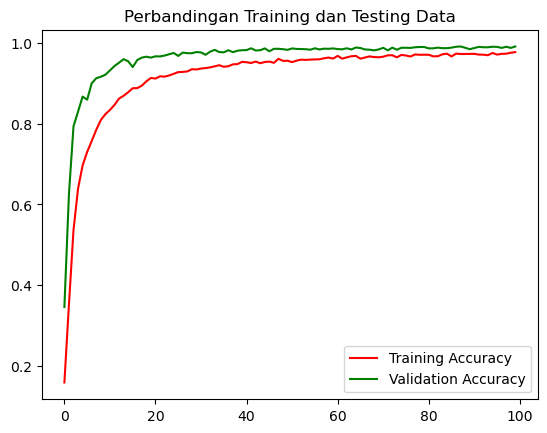

<Figure size 640x480 with 0 Axes>

In [17]:
plt.plot(epoch, accuracy, 'r', label = "Training Accuracy")
plt.plot(epoch, val_accuracy, 'g', label = "Validation Accuracy")
plt.title("Perbandingan Training dan Testing Data")
plt.legend(loc=0)
plt.figure()
plt.show()

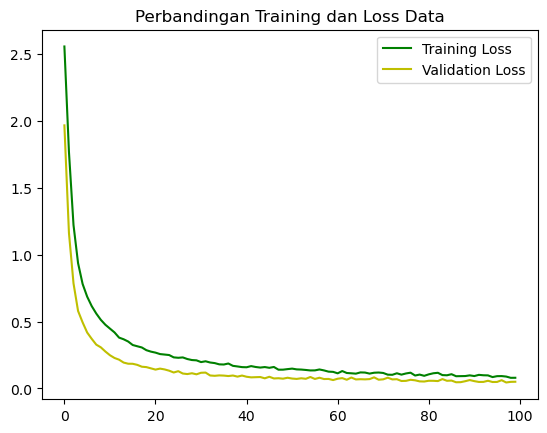

<Figure size 640x480 with 0 Axes>

In [18]:
plt.plot(epoch, loss, 'g', label="Training Loss")
plt.plot(epoch, val_loss, 'y', label = "Validation Loss")
plt.title("Perbandingan Training dan Loss Data")
plt.legend(loc=0)
plt.figure()
plt.show()

In [19]:
val_loss,val_accuracy = model.evaluate(X_test, y_test, batch_size=64)

49/49 [==============================] - 0s 1ms/step - loss: 0.0499 - accuracy: 0.9917


In [20]:
print(f"Validation Loss: {val_loss * 100 : .2f}%")
print(f"Validation Accuracy: {val_accuracy * 100 : .2f}%")

Validation Loss:  4.99%
Validation Accuracy:  99.17%


In [21]:
 X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9341, 42), (3114, 42), (9341,), (3114,))

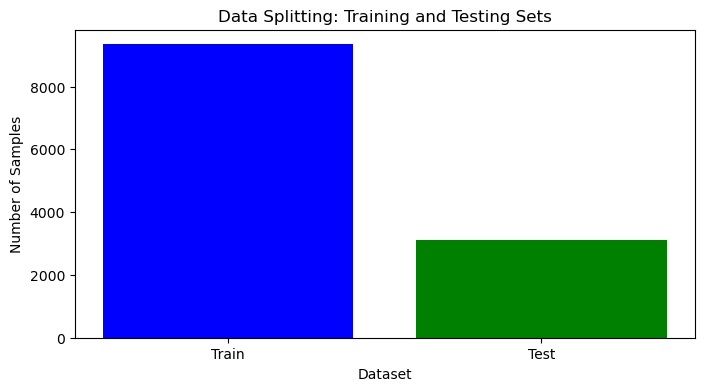

In [22]:
plt.figure(figsize=(8, 4))
plt.bar(['Train', 'Test'], [len(X_train), len(X_test)], color=['blue', 'green'])
plt.title('Data Splitting: Training and Testing Sets')
plt.xlabel('Dataset')
plt.ylabel('Number of Samples')
plt.show()

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

model_validation = RandomForestRegressor().fit(X_train, y_train)

In [24]:
modelScore = model_validation.score(X_train, y_train) 
print(f"Score percentage train accuracy: {modelScore * 100:.2f}%")

Score percentage train accuracy: 99.49%


In [25]:
modelScore = model_validation.score(X_test, y_test) 
print(f"Score percentage test accuracy: {modelScore * 100:.2f}%")

Score percentage test accuracy: 95.95%


In [26]:
cross_validation = cross_val_score(model_validation,X_test, y_test, cv = 5)
cross_validation

array([0.89197679, 0.90808901, 0.91135716, 0.91708667, 0.88497247])

In [27]:
cross_validation_mean = np.mean(cross_validation)
print(f"Cross Validation Accuracy: {cross_validation_mean * 100 : .2f}%")

Cross Validation Accuracy:  90.27%


#### Catatan

- True Positive, model predict 1 ketika truth 1
- False Positive, model predict 1 ketika truth 0

- True Negative, model predict 0 ketika truth 0
- False Negative, model predict 0 ketika truth 1

In [28]:
# Loading the save model
model = tf.keras.models.load_model(model_save_path)

In [29]:
# Inference Test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 107ms/step
[9.9999964e-01 2.2189011e-11 4.8213118e-25 1.5483162e-22 5.6510466e-13
 5.7272417e-17 1.9419300e-08 4.8208050e-14 6.5104885e-08 4.9409906e-27
 1.1115863e-09 2.4434118e-07 1.1257817e-09 2.8646529e-24 1.1809726e-25
 3.5992099e-25 1.0163078e-33 1.8076399e-29 1.8200156e-32 9.5886361e-28]
0


In [30]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

98/98 [==============================] - 0s 1ms/step


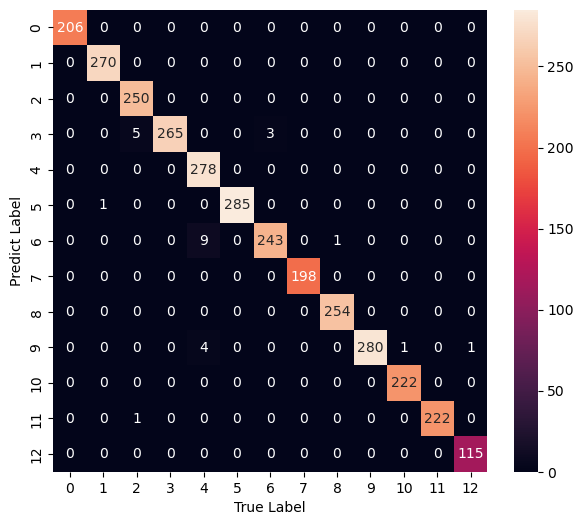

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       206
           1       1.00      1.00      1.00       270
           2       0.98      1.00      0.99       250
           3       1.00      0.97      0.99       273
           4       0.96      1.00      0.98       278
           5       1.00      1.00      1.00       286
           6       0.99      0.96      0.97       253
           7       1.00      1.00      1.00       198
           8       1.00      1.00      1.00       254
           9       1.00      0.98      0.99       286
          10       1.00      1.00      1.00       222
          11       1.00      1.00      1.00       223
          12       0.99      1.00      1.00       115

    accuracy                           0.99      3114
   macro avg       0.99      0.99      0.99      3114
weighted avg       0.99      0.99      0.99      3114



In [31]:
# Matrics menggunakan sklearn
def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    
    plt.xlabel("True Label")
    plt.ylabel("Predict Label")
    
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

###### Catatan
- Precision indicates the proportion of positive identification which were actually correct.
- Recall Indicates the proportion of actual positives whic were correctly classified

In [32]:
# Contoh kasus 
# hand_true = np.zeros(1000)
# hand_true[0] = 1

# hand_preds = np.zeros(1000)
# pd.DataFrame(classification_report(hand_true,
#                                   hand_preds,
#                                   output_dict=True,
#                                   zero_division=0))

In [33]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

C:\Users\ASUS\miniconda3\envs\coba_env\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [34]:
# Transform model (quantization)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\ASUS\AppData\Local\Temp\tmp2fv_i3kl\assets


INFO:tensorflow:Assets written to: C:\Users\ASUS\AppData\Local\Temp\tmp2fv_i3kl\assets


23048

In [35]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [36]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [37]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [38]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [39]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.9999976e-01 1.6405400e-11 2.6592218e-25 9.4459833e-23 3.5415125e-13
 3.3599054e-17 1.4465703e-08 2.7618161e-14 4.6381544e-08 2.3665122e-27
 7.2077527e-10 2.1946825e-07 8.4016316e-10 1.3704128e-24 5.3577134e-26
 1.6541744e-25 3.8925026e-34 7.2686718e-30 7.0536596e-33 4.2431809e-28]
0
